# Transformada de Fourier en Imágenes
**Ricardo Antonio Gutiérrez Esparza \
Juan Marquina Cancino**

OpenCV tiene funciones cv2.dft() y cv2.idft(),y nos proporciona dos canales:

El primer canal representa la parte real del resultado.
El segundo canal para la parte imaginaria del resultado.

Entonces, la forma del np.ndarray devuelto por las funciones será (rows, cols, 2).

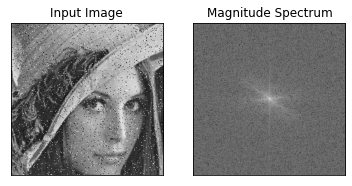

In [2]:
import numpy as np
import cv2
from matplotlib import pyplot as plt


#img = cv2.imread('noisy.png',0)
img = cv2.imread('noisy_lena.png',0)

img_float32 = np.float32(img)

dft = cv2.dft(img_float32, flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()         

En esta sección, crearemos un Filtro de paso bajo (low pass filter) LPF para eliminar contenidos de alta frecuencia en la imagen. En otras palabras, vamos a aplicar LPF a la imagen que tiene un efecto suavizado (se aprecia como desenfoque).

Hemos seleccionado un rango r de +-50 unidades para el paso del filtro

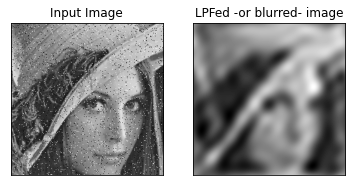

In [4]:
rows, cols = img.shape
crow, ccol = int(rows/2) , int(cols/2)     # center

#crea máscara mask, con 0 y 1 (cero para las frecuencias que no pasan el filtro)
r = 8
mask = np.zeros((rows, cols, 2), np.uint8)
mask[crow-r:crow+r, ccol-r:ccol+r] = 1

#aplica filtro / mask
fshift = dft_shift*mask
f_ishift = np.fft.ifftshift(fshift)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_back, cmap = 'gray')
plt.title('LPFed -or blurred- image'), plt.xticks([]), plt.yticks([])

plt.show()    

# Parte 1

In [5]:
def low_pass_filter(r):
    rows, cols = img.shape
    crow, ccol = int(rows/2) , int(cols/2)     # center

    #crea máscara mask, con 0 y 1 (cero para las frecuencias que no pasan el filtro)
    mask = np.zeros((rows, cols, 2), np.uint8)
    mask[crow-r:crow+r, ccol-r:ccol+r] = 1

    #aplica filtro / mask
    fshift = dft_shift*mask
    f_ishift = np.fft.ifftshift(fshift)
    img_back = cv2.idft(f_ishift)
    img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])

    plt.subplot(121),plt.imshow(img, cmap = 'gray')
    plt.title('Input Image'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(img_back, cmap = 'gray')
    plt.title('LPFed -or blurred- image'), plt.xticks([]), plt.yticks([])

    plt.show()

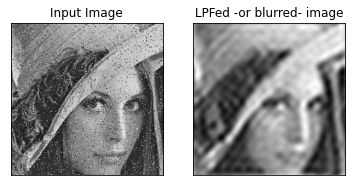

In [6]:
low_pass_filter(15)

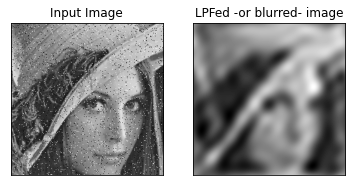

In [7]:
low_pass_filter(8)

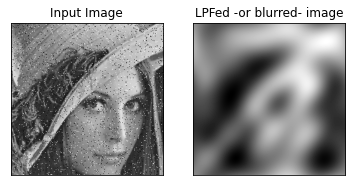

In [8]:
low_pass_filter(4)

Entre más pequeño es el rango de las frequencias que dejamos pasar con el LPF, más borrosa se vuelve la imagen. Esto probablemente se debe a que eliminamos las altas frecuencias, que en términos de la imagen son las que marcan las diferencias entre pixeles claros y obscuros, es decir, los bordes (o los lugares donde el contraste es alto). Asimismo, el ruido es considerablemente reducido cuando aplicamos este tipo de filtro

In [9]:
def high_pass_filter(r):
    rows, cols = img.shape
    crow, ccol = int(rows/2) , int(cols/2)     # center

    #crea máscara mask, con 0 y 1 (cero para las frecuencias que no pasan el filtro)
    mask = np.ones((rows, cols, 2), np.uint8)
    mask[crow-r:crow+r, ccol-r:ccol+r] = 0

    #aplica filtro / mask
    fshift = dft_shift*mask
    f_ishift = np.fft.ifftshift(fshift)
    img_back = cv2.idft(f_ishift)
    img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])

    plt.subplot(121),plt.imshow(img, cmap = 'gray')
    plt.title('Input Image'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(img_back, cmap = 'gray')
    plt.title('HPFed'), plt.xticks([]), plt.yticks([])

    plt.show()

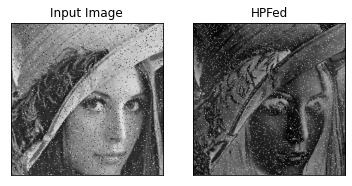

In [10]:
high_pass_filter(1)

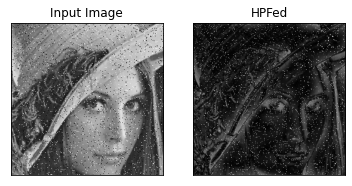

In [11]:
high_pass_filter(4)

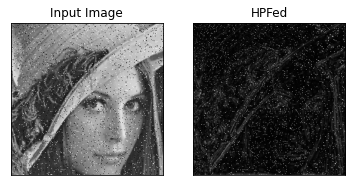

In [12]:
high_pass_filter(16)

Cuando dejamos pasar las frecuencias altas, vemos que se marcan los bordes de la imagen. También vale la pena notar que el ruido de la imagen se mantiene en la imagen a la que le aplicamos el HPF. Nuevamente, esto tiene que ver con el contraste y el efecto que tiene al ser ser representado en espectro de magnitudes.

In [13]:
def band_pass_filter(rl, rh):
    rows, cols = img.shape
    crow, ccol = int(rows/2) , int(cols/2)     # center

    #crea máscara mask, con 0 y 1 (cero para las frecuencias que no pasan el filtro)
    mask = np.zeros((rows, cols, 2), np.uint8)
    mask[crow-rl:crow+rl, ccol-rl:ccol+rl] = 1
    mask[crow-rh:crow+rh, ccol-rh:ccol+rh] = 0

    #aplica filtro / mask
    fshift = dft_shift*mask
    f_ishift = np.fft.ifftshift(fshift)
    img_back = cv2.idft(f_ishift)
    img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])

    plt.subplot(121),plt.imshow(img, cmap = 'gray')
    plt.title('Input Image'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(img_back, cmap = 'gray')
    plt.title('BPFed'), plt.xticks([]), plt.yticks([])

    plt.show()

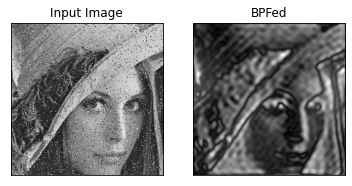

In [14]:
band_pass_filter(20, 1)

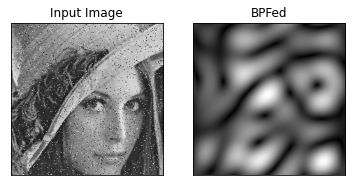

In [15]:
band_pass_filter(3, 2)

El BPF combina ambas caracterísitcas de los filtros descritos con anterioridad, por lo que, con los valores adecuados, es fácil identificar los bordes de la imagen, con menos ruido. Asimismo, valores extremos generarán resultados muy distantes de la imagen original.

# Parte 2

In [16]:
def graph_magnitude_spectrum(path, cmap='gray'):
    img = cv2.imread(path,0)

    img_float32 = np.float32(img)

    dft = cv2.dft(img_float32, flags = cv2.DFT_COMPLEX_OUTPUT)
    dft_shift = np.fft.fftshift(dft)

    magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))

    plt.subplot(121),plt.imshow(img, cmap = 'gray')
    plt.title('Input Image'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(magnitude_spectrum, cmap=cmap)
    plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
    plt.show() 

Pintamos el dominio de las frecuencias para poder apreciar con más claridad los patrones.

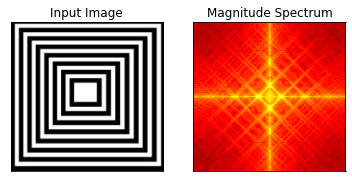

In [17]:
graph_magnitude_spectrum('test_im_1.png', cmap='hot')

En esta primera imagen, podemos ver que tanto la imagen como el espectro de magnitudes son simétricos respecto al centro. Asimismo, el patrón que se genera en el espectro es similar al de la imagen, en el que tenemos figuras geométricas concéntricas. La imagen dada es un patrón periódico, por ello se presenta un claro patrón es el espectro de las magnitudes.

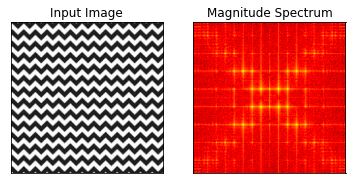

In [18]:
graph_magnitude_spectrum('test_im_2.png', cmap='hot')

En la segunda imagen, también tenemos un patrón simétrico, aunque respecto al eje Y. Dos bandas diagonales se marcan, probablemente representando los bordes del zig-zag. Nuevamente estamos ante un patrón periódico.